<a href="https://colab.research.google.com/github/deejay14/Jhakas-NewsWala/blob/main/Users_vs_articles_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('gdrive/My Drive/final_fixed_scrapped.csv')

In [5]:
df1=pd.read_csv('doc_vs_topic.csv')

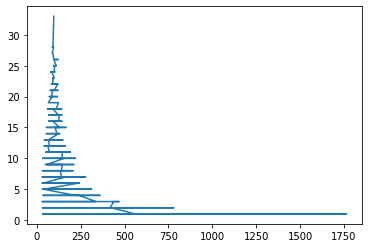

In [8]:
list=df['totalwords'].tolist()
time=[]
for i in range(7843):
  time.append(round((60*(list[i]/200)),2))
df['average_reading_time(sec)']=time
counts=df['average_reading_time(sec)'].value_counts()
ax=counts.plot()
l=ax.get_lines()[0].get_xydata()
data = l

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=12)
model=gmm.fit(data)
def sample(i):
    flag = True
    while flag:
      Xnew, Ynew = model.sample(i)
      if Xnew[0][0]<0:
         flag=True
     #print(Xnew[0][0])
      else: flag=False
    return(Xnew[0][0])

      


In [9]:
def user_vs_article(df,users_no): ## df1 - dataframe of doc vs topic, no. of users
    list1=df1.to_numpy()
    list1=list1[0:7843,1:12]
    list1[0,:]
    article_topic=[]
    for i in range(7843):
        list2=list1[i].tolist()
        #print(list2)
        list3=np.copy(list2)
        list3.sort()
        #print(list3)
        max=list3[10]
        article_topic.append(list2.index(max))
    z=[]
    for i in range(7843):
        z.append(i)
    topic=np.column_stack((article_topic,z))
    topic0=[]
    topic1=[]
    topic2=[]
    topic3=[]
    topic4=[]
    topic5=[]
    topic6=[]
    topic7=[]
    topic8=[]
    topic9=[]
    topic10=[]
    for i in range(7843):
        if topic[i][0]==0:
           topic0.append(topic[i][1])
        elif topic[i][0]==1:
             topic1.append(topic[i][1])
        elif topic[i][0]==2:
             topic2.append(topic[i][1])
        elif topic[i][0]==3:
             topic3.append(topic[i][1])
        elif topic[i][0]==4:
             topic4.append(topic[i][1])
        elif topic[i][0]==5:
             topic5.append(topic[i][1])
        elif topic[i][0]==6:
             topic6.append(topic[i][1])
        elif topic[i][0]==7:
             topic7.append(topic[i][1])
        elif topic[i][0]==8:
             topic8.append(topic[i][1])
        elif topic[i][0]==9:
             topic9.append(topic[i][1])
        elif topic[i][0]==10:
             topic10.append(topic[i][1]) 


    ## Clickstream generator lists
    lz=[]## reference list
    for i in range(users_no):
        flag = True
        while flag:
              s = np.random.poisson(1, 1)
              if s[0]> 0:
                 lz.append(s[0])
                 flag=False
        
              else: flag=True
    user_id=[]
    #print(lz)
    k=1
    for i in range(len(lz)):
        for j in range(lz[i]*10):
            user_id.append(k)
        k=k+1
    rank=[]
    t=[1,2,3,4,5,6,7,8,9,10]
    for i in range(len(lz)):
        for j in range(lz[i]):
            rank=rank+t  


    q=[]## click list
    for i in range(len(lz)):
        for j in range(lz[i]):
           r=np.random.poisson(3, 1)
           t=np.random.binomial(1,0.5,size=10)
           min=np.minimum(r,sum(t))
            #print(min)
           j=0
           a=0
           while j < min:
                if t[a]==1:
                   j=j+1
                   a=a+1
                else: a=a+1
 
           t_=t[0:a]
           t_=t_.tolist()

           for i in range(10-a):
               t_=t_ + [0]
           q=q+t_
    click=[]
    read_time=[]
    for i in range(len(q)):
       if q[i]==0:
          click.append('No')
       else: click.append('Yes')
    for i in range(len(q)):
        if q[i]==0:
           read_time.append('NaN')
        else: read_time.append(sample(1))            
#session id
    sessionid=[]

    for j in lz:
        for k in range(j):
            t=k+1
            t_=[t for i in range(10)]
            sessionid=sessionid+t_  
    article_id=[]
    for i in range(len(lz)):
       for j in range(lz[i]):
          for p1 in range(3):
              article_id.append(random.choice(topic4))
          for p2 in range(2):
              article_id.append(random.choice(topic7))
          article_id.append(random.choice(topic0))
          article_id.append(random.choice(topic2))
          article_id.append(random.choice(topic3))
          article_id.append(random.choice(topic5))
          article_id.append(random.choice(topic10)) 

    t_spent=read_time
    article_id_list=article_id 
    #print(t_spent)
    user_vs_doc=np.zeros((users_no,7843)) 



    ## User vs article matrix generator
    u=0
    j0=0
    #print(lz)
    for i in lz:  
        for j in range(i*10):
            j0=sum(lz[0:u])*10+j
            #print(j0)
            index=article_id_list[j0]
            if type(t_spent[j0])==str:
               user_vs_doc[u][index]=0.0
          #print(index)  
            else: user_vs_doc[u][index] = t_spent[j0]/time[index]
        #print(user_vs_doc[u][index])
        u=u+1
    for i in range(users_no):
        for j in range(7843):
            if user_vs_doc[i][j]>1:
               user_vs_doc[i][j]=1.0
    #user_vs_doc

    columns=[i for i in range(7843)]   
    index=[j for j in range(users_no)]
    df_user_vs_doc = pd.DataFrame(user_vs_doc, columns =columns, index = index) 
    return(df_user_vs_doc)      














            
      


In [16]:
df_uservsarticle=user_vs_article(df1,1000)

In [19]:
df_uservsarticle.to_csv('user_vs_article.csv')
from google.colab import files
files.download("user_vs_article.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>